In [1]:
pip install camb

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ---------------------------------------- 1.4/1.4 MB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import numpy as np
from matplotlib import pyplot as plt
import camb
from camb import model, initialpower

print('Using CAMB %s installed at %s' % (camb.__version__, os.path.dirname(camb.__file__)))

Using CAMB 1.6.4 installed at C:\Users\jipde\OneDrive\Documenten\da\Lib\site-packages\camb


In [11]:
# Set up a new set of parameters for CAMB
# The defaults give one massive neutrino and helium set using BBN consistency
pars = camb.set_params(
    H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06, As=2e-9, ns=0.965, halofit_version='mead', lmax=3000
)

In [12]:
results = camb.get_results(pars) #returns CAMBdata instance

In [13]:
# get dictionary of CAMB power spectra
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers:
    print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [14]:
# Now get matter power spectra and sigma8 at redshift 0 and 0.8
# parameters can all be passed as a dict as above, or you can call
# separate functions to set up the parameter object
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965)
# Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0.0, 0.8], kmax=2.0)

# Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
s8 = np.array(results.get_sigma8())

# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)

print('sigma 8 values at the two redshifts:', results.get_sigma8())


Note: redshifts have been re-sorted (earliest first)
sigma 8 values at the two redshifts: [0.53304914 0.802608  ]


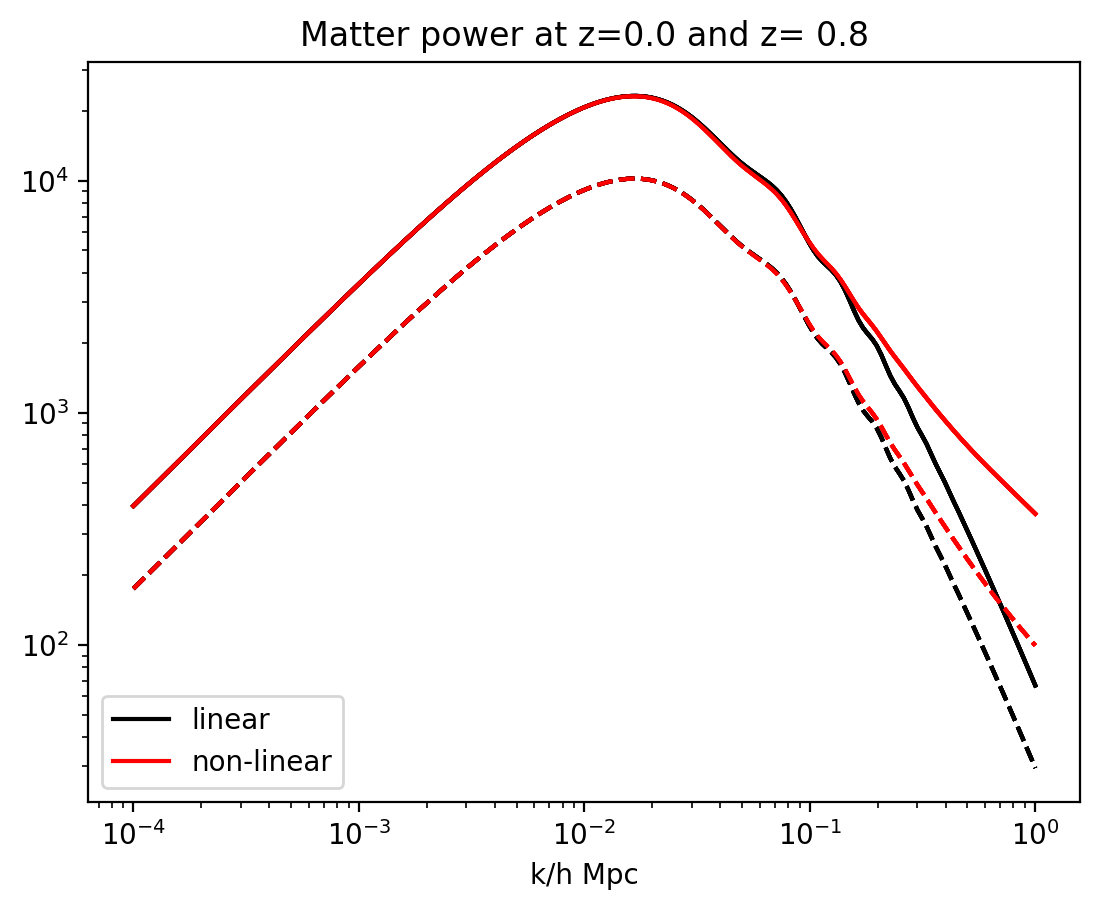

In [17]:
for i, (redshift, line) in enumerate(zip(z, ['-', '--'])):
    plt.loglog(kh, pk[i, :], color='k', ls=line)
    plt.loglog(kh_nonlin, pk_nonlin[i, :], color='r', ls=line)
plt.xlabel('k/h Mpc')
plt.legend(['linear', 'non-linear'], loc='lower left')
plt.title('Matter power at z=%s and z=%s' % tuple(z))
plt.show()

Note: redshifts have been re-sorted (earliest first)
sigma 8 values at the five redshifts: [0.15753276 0.17169569 0.18863862 0.20925476 0.23485384 0.26742302
 0.31008965 0.36794342 0.44936122 0.56702494 0.73163114]


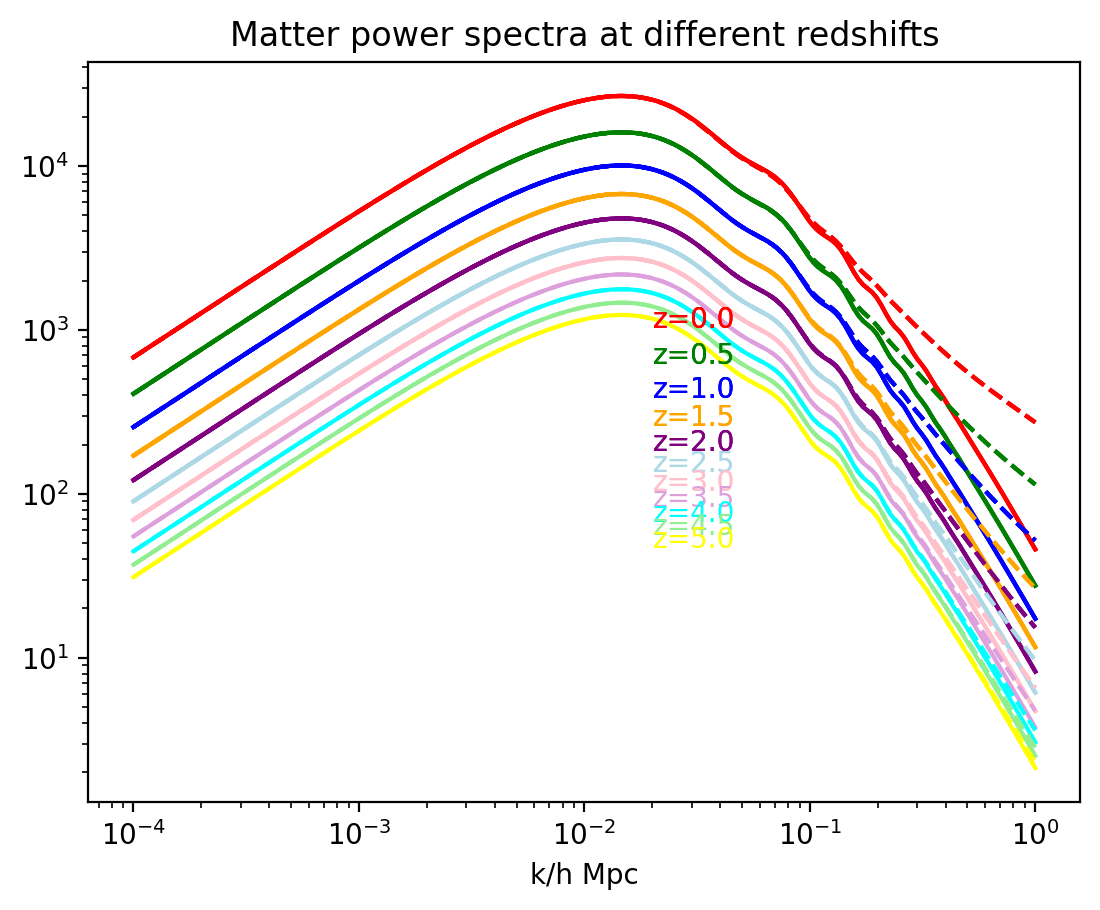

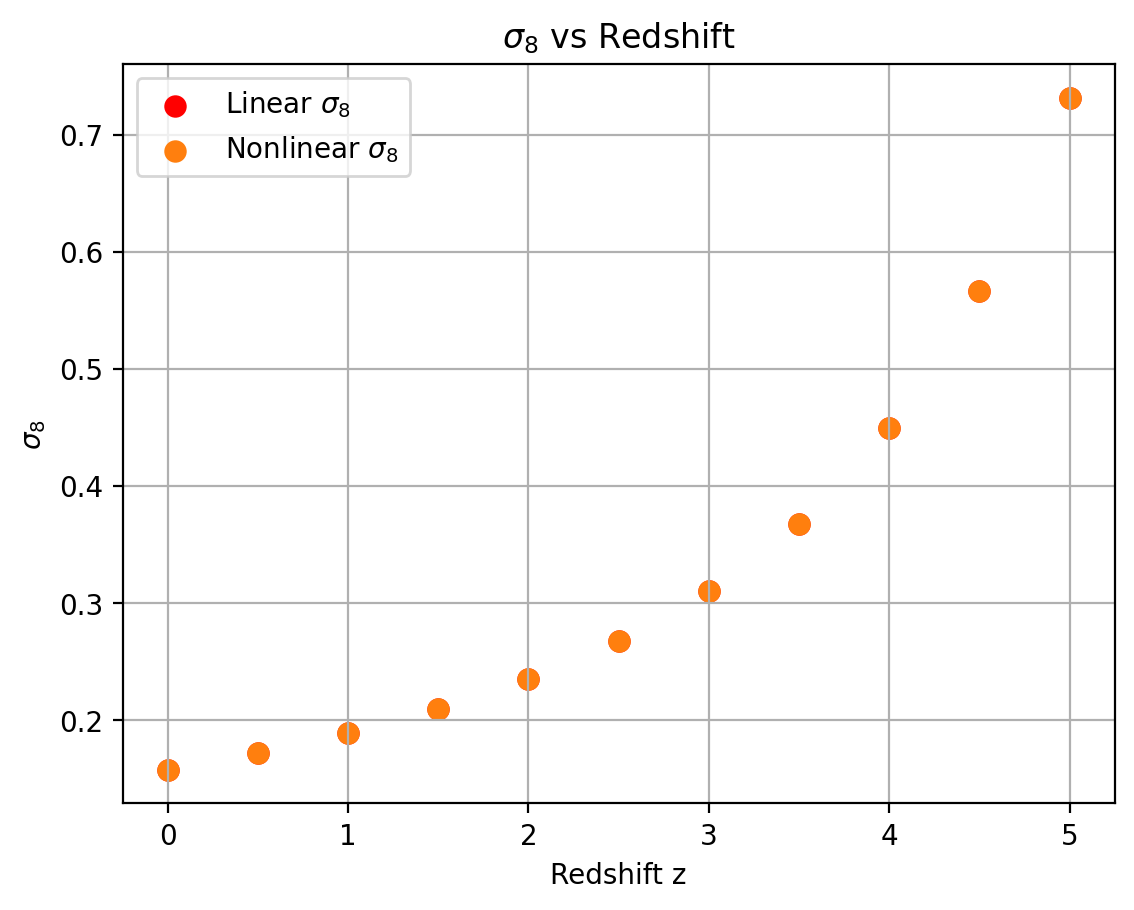

In [23]:
#practice 
pars = camb.set_params(H0=67.5, ombh2=0.023, omch2=0.111, ns=0.9)
pars.set_matter_power(redshifts=[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], kmax=2.0) #different redshifts
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
s8 = np.array(results.get_sigma8())


# Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
s8_nonlin = np.array(results.get_sigma8())
print('sigma 8 values at the five redshifts:', results.get_sigma8())
colors = ['red', 'green', 'blue', 'orange', 'purple', 'lightblue', 'pink', 'plum', 'cyan', 'lightgreen', 'yellow']
for i, zi in enumerate(z):
    # Linear P(k)
    plt.loglog(kh, pk[i, :], color=colors[i], ls='-', label=f'Linear z={zi}')
    # Nonlinear P(k)
    plt.loglog(kh_nonlin, pk_nonlin[i, :], color=colors[i], ls='--', label=f'Nonlinear z={zi}')
    plt.text(0.02, pk[i, 10], f"z={zi}", color=colors[i])
plt.xlabel('k/h Mpc')
plt.title('Matter power spectra at different redshifts')
plt.show()

plt.scatter(z, s8, color='Red', label='Linear $\sigma_8$', s=50)
plt.scatter(z, s8_nonlin, color='C1', label='Nonlinear $\sigma_8$', s=50)

plt.xlabel('Redshift z')
plt.ylabel(r'$\sigma_8$')
plt.title('$\sigma_8$ vs Redshift')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
#Generate a mock power spectrum from fiducial data at redshift z=1
pars = camb.set_params(H0=67.5, ombh2=0.022, omch2=0.122, ns=0.965)
pars.set_matter_power(redshifts=[1], kmax=2.0) #redshift 1
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
pk = pk[0, :]
pk_mock = pk * (1 + 0.05 * np.random.randn(len(pk))) #add random noise (fraction 0.05 of normal distribution with mean 0 and variance 1)

chi_square_list = []
#We will vary H0
H0_values = np.linspace(65, 75, 500)
for H0 in H0_values:
    pars = camb.set_params(H0=H0, ombh2=0.022, omch2=0.122, ns=0.965)
    pars.set_matter_power(redshifts=[1], kmax=2.0) #redshift 1
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk_test = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints=200)
    chi_square = np.sum(((pk_mock - pk_test)/ (0.05*pk_mock))**2)
    chi_square_list.append(chi_square)

min_chi_square = np.argmin(chi_square_list)
best_H0 = H0_values[min_chi_square]
print('Best value for H0 is', best_H0)



Best value for H0 is 67.50501002004007


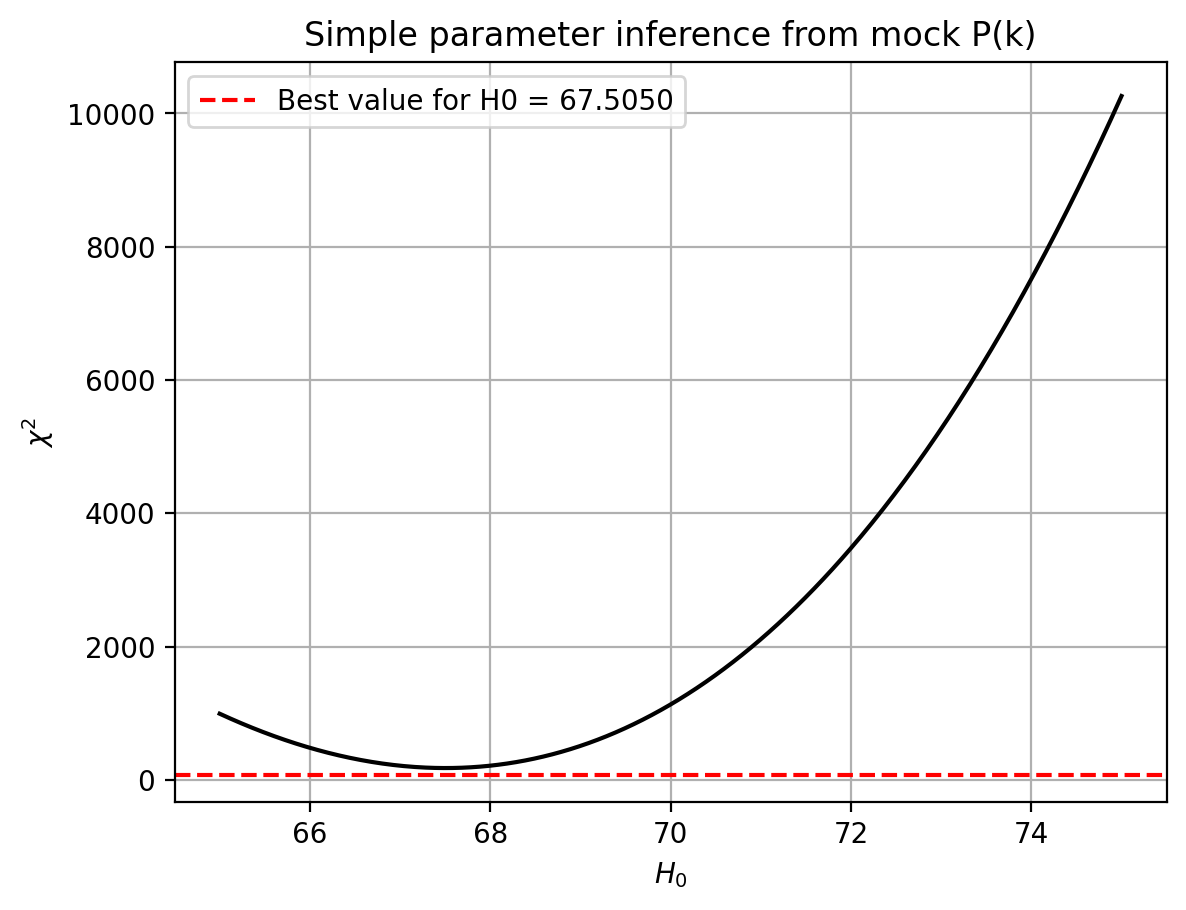

In [28]:
plt.plot(H0_values, chi_square_list, '-k')
plt.axhline(best_H0, ls='--', c='red', label=f'Best value for H0 = {best_H0:.4f}')
plt.xlabel(r'$H_0$')
plt.ylabel(r'$\chi^2$')
plt.title('Simple parameter inference from mock P(k)')
plt.grid(True)
plt.legend()
plt.show()